In [1]:
import pandas as pd 

In [20]:
train=pd.read_csv("tested.csv")
print(train)

     PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from warnings import filterwarnings
filterwarnings(action='ignore')

In [21]:
train.shape

(418, 12)

In [22]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [23]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
train_age_reshaped = train.Age.values.reshape(-1, 1)
new = imputer.fit_transform(T_data_age_reshaped)
train['Age2']=new

In [24]:
train.drop('Age',axis=1,inplace=True)

In [25]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Age2             0
dtype: int64

In [26]:
if 'PassengerId' in train.columns or 'PassengerId' in [col.strip() for col in train.columns]:
    print("Column 'PassengerId' exists in the DataFrame.")
else:
    print("Column 'PassengerId' does not exist in the DataFrame.")

Column 'PassengerId' exists in the DataFrame.


In [28]:
print(train.index.name)
passenger_ids = train.index

None


In [29]:
train.reset_index(inplace=True)

In [30]:
train.set_index('PassengerId',inplace=True)
train = pd.get_dummies(train, columns=["Sex"], drop_first=True)
train = pd.get_dummies(train, columns=["Embarked"],drop_first=True)

In [31]:
column_values = train['Fare'].values
for value in column_values:
    print(value)

7.8292
7.0
9.6875
8.6625
12.2875
9.225
7.6292
29.0
7.2292
24.15
7.8958
26.0
82.2667
26.0
61.175
27.7208
12.35
7.225
7.925
7.225
59.4
3.1708
31.6833
61.3792
262.375
14.5
61.9792
7.225
30.5
21.6792
26.0
31.5
20.575
23.45
57.75
7.2292
8.05
8.6625
9.5
56.4958
13.4167
26.55
7.85
13.0
52.5542
7.925
29.7
7.75
76.2917
15.9
60.0
15.0333
23.0
263.0
15.5792
29.125
7.8958
7.65
16.1
262.375
7.8958
13.5
7.75
7.725
262.375
21.0
7.8792
42.4
28.5375
263.0
7.75
7.8958
7.925
27.7208
211.5
211.5
8.05
25.7
13.0
7.75
15.2458
221.7792
26.0
7.8958
10.7083
14.4542
7.8792
8.05
7.75
23.0
13.9
7.775
52.0
8.05
26.0
7.7958
78.85
7.925
7.8542
8.05
55.4417
26.0
7.75
7.775
8.5167
22.525
7.8208
7.75
8.7125
13.0
15.0458
7.7792
31.6792
7.2833
221.7792
14.4542
6.4375
16.7
75.2417
26.0
15.75
7.75
57.75
7.25
7.75
16.1
7.7958
23.25
13.0
8.05
8.05
28.5
25.4667
6.4375
7.8958
7.8542
7.225
13.0
8.05
46.9
46.9
151.55
262.375
26.0
26.55
18.0
51.8625
8.05
26.55
26.0
83.1583
7.8958
nan
12.1833
31.3875
7.55
221.7792
7.8542
26.55
13.7

In [32]:
train.dropna(subset=['Fare'], inplace=True)
train = train[~train['Fare'].isin([np.inf, -np.inf])] 

train['Fare'] = train['Fare'].astype(int)
train.loc[train.Fare<=7.91,'Fare']=0
train.loc[(train.Fare>7.91) &(train.Fare<=14.454),'Fare']=1
train.loc[(train.Fare>14.454)&(train.Fare<=31),'Fare']=2
train.loc[(train.Fare>31),'Fare']=3

In [33]:
train['Age2']=train['Age2'].astype(int)
train.loc[ train['Age2'] <= 16, 'Age2']= 0
train.loc[(train['Age2'] > 16) & (train['Age2'] <= 32), 'Age2'] = 1
train.loc[(train['Age2'] > 32) & (train['Age2'] <= 48), 'Age2'] = 2
train.loc[(train['Age2'] > 48) & (train['Age2'] <= 64), 'Age2'] = 3
train.loc[train['Age2'] > 64, 'Age2'] = 4

In [34]:
train.drop(['Ticket','Cabin','Name'],axis=1,inplace=True)
train.head()
print(type(train.Age2))

<class 'pandas.core.series.Series'>


In [35]:
train.shape

(417, 10)

In [36]:
train.Survived.value_counts()/len(train)*100
#This signifies almost 63% people in the ship died and 36% survived.

0    63.549161
1    36.450839
Name: Survived, dtype: float64

In [37]:
train.describe()

,index,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,208.635492,0.364508,2.263789,0.448441,0.393285,1.438849,1.294964,0.635492,0.110312,0.645084
std,120.923774,0.481870,0.842077,0.897568,0.982419,1.140060,0.757525,0.481870,0.313654,0.479063
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,104.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,209.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,313.000000,1.000000,3.000000,1.000000,0.000000,2.000000,2.000000,1.000000,0.000000,1.000000
max,417.000000,1.000000,3.000000,8.000000,9.000000,3.000000,4.000000,1.000000,1.000000,1.000000


In [38]:
train.groupby('Survived').mean()

,index,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
Survived,,,,,,,,,
0,210.841509,2.332075,0.381132,0.275472,1.252830,1.279245,1.0,0.083019,0.683019
1,204.789474,2.144737,0.565789,0.598684,1.763158,1.322368,0.0,0.157895,0.578947


In [39]:
train.groupby('Sex_male').mean()

,index,Survived,Pclass,SibSp,Parch,Fare,Age2,Embarked_Q,Embarked_S
Sex_male,,,,,,,,,
0,204.789474,1.0,2.144737,0.565789,0.598684,1.763158,1.322368,0.157895,0.578947
1,210.841509,0.0,2.332075,0.381132,0.275472,1.252830,1.279245,0.083019,0.683019


In [40]:
train.corr()

,index,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
index,1.000000,-0.024117,-0.025800,0.003259,0.042650,0.039018,-0.025302,0.024117,-0.036141,0.048884
Survived,-0.024117,1.000000,-0.107203,0.099136,0.158534,0.215701,0.027431,-1.000000,0.115033,-0.104681
Pclass,-0.025800,-0.107203,1.000000,0.002136,0.019581,-0.726832,-0.472731,0.107203,0.253614,0.119420
SibSp,0.003259,0.099136,0.002136,1.000000,0.306566,0.338126,-0.078339,-0.099136,-0.099290,0.080331
Parch,0.042650,0.158534,0.019581,0.306566,1.000000,0.334878,-0.039969,-0.158534,-0.133330,0.092990
Fare,0.039018,0.215701,-0.726832,0.338126,0.334878,1.000000,0.275621,-0.215701,-0.344103,0.004180
Age2,-0.025302,0.027431,-0.472731,-0.078339,-0.039969,0.275621,1.000000,-0.027431,-0.056336,-0.095023
Sex_male,0.024117,-1.000000,0.107203,-0.099136,-0.158534,-0.215701,-0.027431,1.000000,-0.115033,0.104681
Embarked_Q,-0.036141,0.115033,0.253614,-0.099290,-0.133330,-0.344103,-0.056336,-0.115033,1.000000,-0.474720
Embarked_S,0.048884,-0.104681,0.119420,0.080331,0.092990,0.004180,-0.095023,0.104681,-0.474720,1.000000


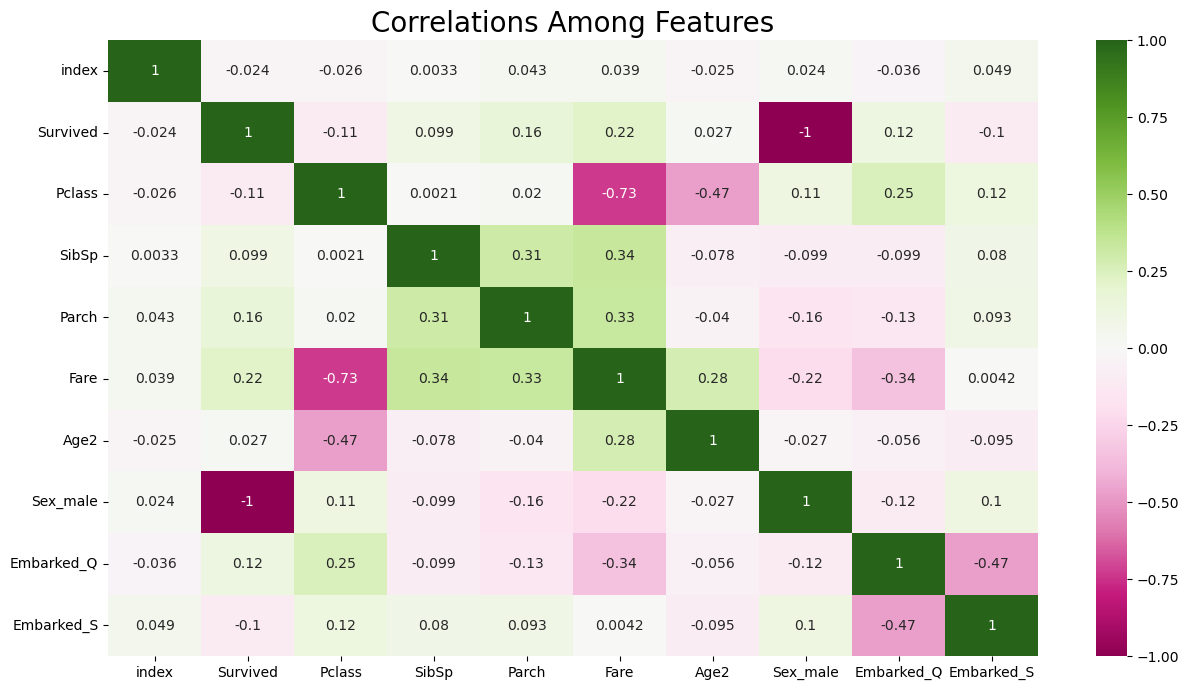

In [41]:
plt.subplots(figsize = (15,8))
sns.heatmap(train.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 20);

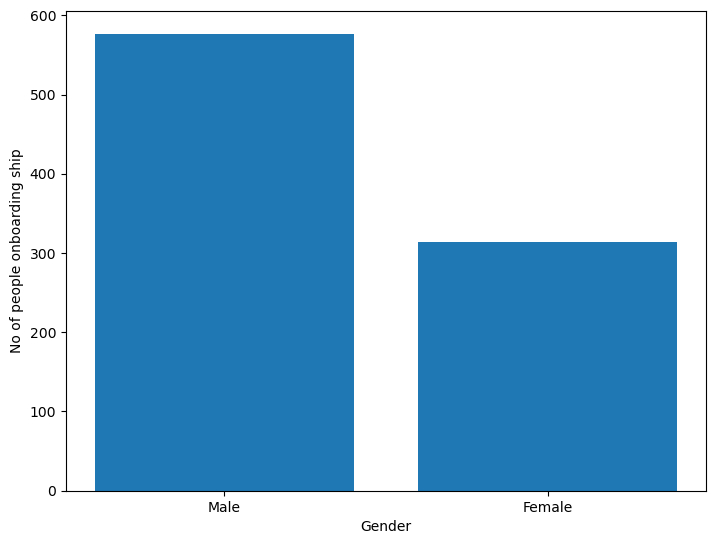

In [42]:
#Plotting
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male','Female']
index = [577,314]
ax.bar(gender,index)
plt.xlabel("Gender")
plt.ylabel("No of people onboarding ship")
plt.show()

# 1 is for male and 0 is for female.

In [43]:
train.head(10)

,index,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
892,0,0,3,0,0,0,2,1,1,0
893,1,1,3,1,0,0,2,0,0,1
894,2,0,2,0,0,1,3,1,1,0
895,3,0,3,0,0,1,1,1,0,1
896,4,1,3,1,1,1,1,0,0,1
897,5,0,3,0,0,1,0,1,0,1
898,6,1,3,0,0,0,1,0,1,0
899,7,0,2,1,1,2,1,1,0,1
900,8,1,3,0,0,0,1,0,0,0


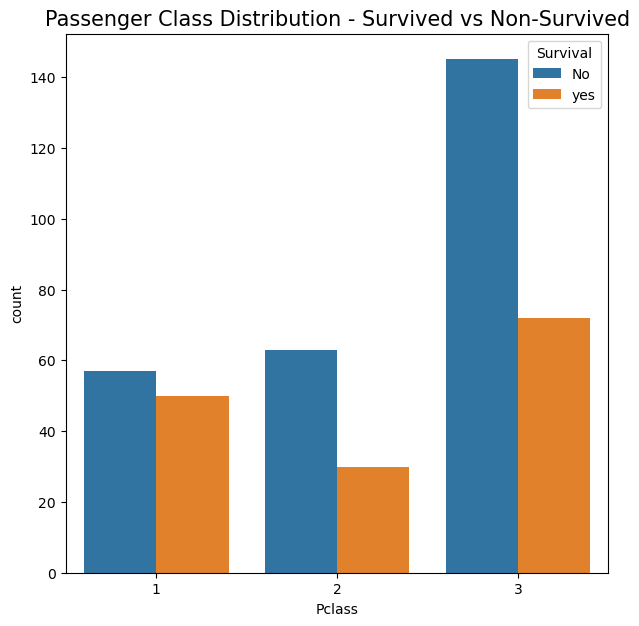

In [44]:
plt.subplots(figsize = (7,7))
ax=sns.countplot(x='Pclass',hue='Survived',data=train)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 15)
leg=ax.get_legend()
leg.set_title('Survival')
legs=leg.texts

legs[0].set_text('No')
legs[1].set_text("yes")

([<matplotlib.axis.XTick at 0x1d6e4349190>,
 [Text(1, 0, 'First'), Text(2, 0, 'Second'), Text(3, 0, 'Third')])

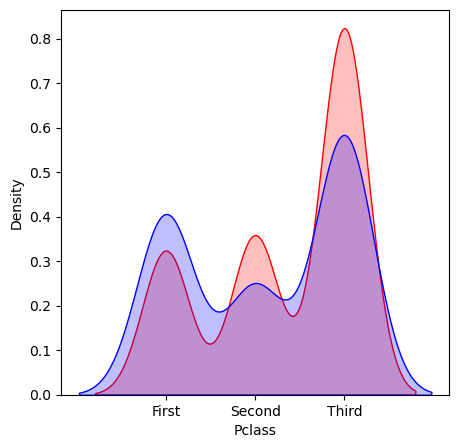

In [45]:
plt.subplots(figsize=(5,5))
sns.kdeplot(train.loc[(train['Survived'] == 0),'Pclass'],shade=True,color='r',label='Not Survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'],shade=True,color='b',label='Survived' )

labels = ['First', 'Second', 'Third']
plt.xticks(sorted(train.Pclass.unique()),labels)

<Axes: xlabel='Age2', ylabel='Density'>

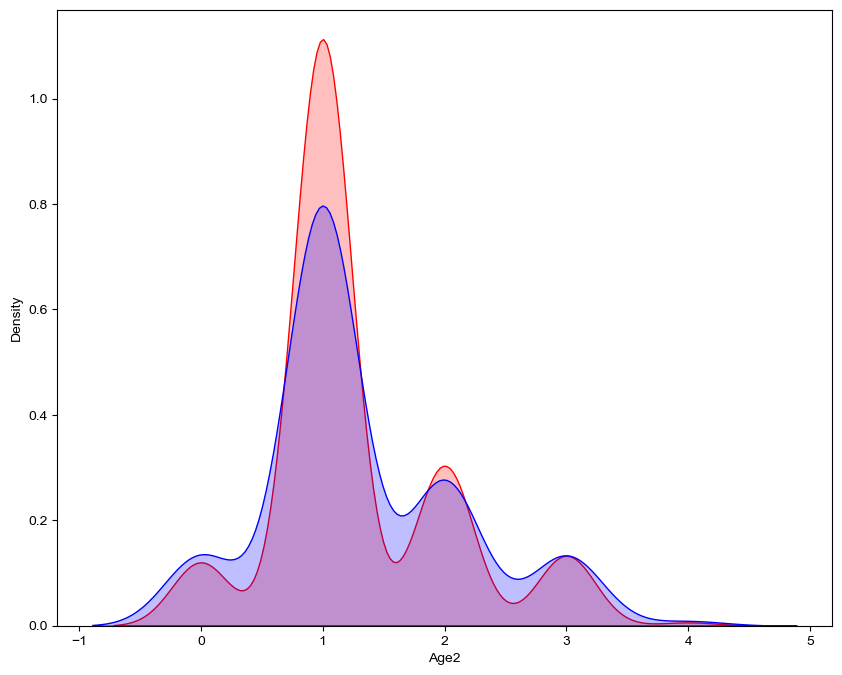

In [46]:
#fig,axs=plt.subplots(nrows=2)
fig,axs=plt.subplots(figsize=(10,8))
sns.set_style(style='darkgrid')
sns.kdeplot(train.loc[(train['Survived']==0),'Age2'],color='r',shade=True,label='Not Survived')
sns.kdeplot(train.loc[(train['Survived']==1),'Age2'],color='b',shade=True,label='Survived')

In [47]:
#Feature Selection
column_train=['Age2','Pclass','SibSp','Parch','Fare','Sex_male','Embarked_Q','Embarked_S']
#training values
X=train[column_train]
#target value
Y=train['Survived']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=7)

In [49]:
#Using Support Vector
from sklearn.svm import SVC
model1 = SVC()
model1.fit(X_train,Y_train)

pred_y = model1.predict(X_test)

from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(Y_test,pred_y))

Acc= 0.9761904761904762


In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,pred_y)
print(confusion_mat)
print(classification_report(Y_test,pred_y))

[[55  1]
 [ 1 27]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        56
           1       0.96      0.96      0.96        28

    accuracy                           0.98        84
   macro avg       0.97      0.97      0.97        84
weighted avg       0.98      0.98      0.98        84

